In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load datasets

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

### Prepare customer profiles

In [4]:
customer_profiles = transactions.groupby("CustomerID").agg(
    TotalSpent=("TotalValue", "sum"),
    TotalQuantity=("Quantity", "sum"),
    NumTransactions=("TransactionID", "count")
).reset_index()

customer_profiles = customer_profiles.merge(customers, on="CustomerID", how="left")

### One-hot encode categorical data

In [5]:
customer_profiles = pd.get_dummies(customer_profiles, columns=["Region"], drop_first=True)

### Scale data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_profiles = scaler.fit_transform(customer_profiles.drop(columns=["CustomerID", "CustomerName", "SignupDate"]))

### Apply KMeans clustering

In [7]:
kmeans = KMeans(n_clusters=4,random_state=42)
customer_profiles["Cluster"] = kmeans.fit_predict(scaled_profiles)

C:\Users\dell4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Calculationg Davies-Bouldin Index

In [8]:
db_index = davies_bouldin_score(scaled_profiles, customer_profiles["Cluster"])
print(f"\nDavies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.988066754535579


* A high DB Index indicates not well-Separated clusters. This means the clustering algorithm not perforemed effectively in grouping customers.

### Reduce Dimensionality Before Clustering
* Use PCA to reduce dimensionality before clustering to eliminate noise and irrelevant features.

In [9]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_profiles)

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profiles["Cluster"] = kmeans.fit_predict(reduced_data)

C:\Users\dell4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
db_index = davies_bouldin_score(reduced_data, customer_profiles["Cluster"])
print(f"\nDavies-Bouldin Index (PCA + KMeans): {db_index}")


Davies-Bouldin Index (PCA + KMeans): 0.754997112380128


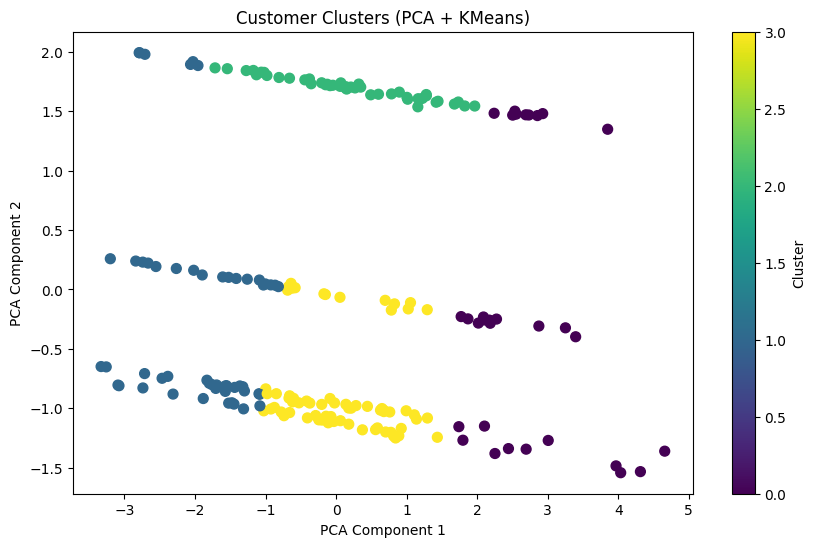

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_profiles["Cluster"], cmap="viridis", s=50)
plt.title("Customer Clusters (PCA + KMeans)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

### Save clustering results to CSV

In [13]:
customer_profiles.to_csv("ShwetaJadhav_Clustering.csv", index=False)

print("\nClustering results have been saved to 'ShwetaJadhav_Clustering.csv'.")



Clustering results have been saved to 'ShwetaJadhav_Clustering.csv'.
